In [1]:
import os
import numpy as np
from numpy.fft import fft2, ifft2
from scipy.signal import gaussian, convolve2d, wiener
import matplotlib.pyplot as plt

In [2]:
def blur(img, mode='gaussian', kernel_size=3):
    # mode: 'gaussian' or 'box' or 'motion'
    dummy = np.copy(img)
    if mode == 'box':
        h = np.ones((kernel_size, kernel_size)) / kernel_size**2
    elif mode == 'gaussian':
        h = gaussian(kernel_size, kernel_size/3).reshape(kernel_size, 1)
        h = np.dot(h, h.T)
        h /= np.sum(h)
    elif mode == 'motion':
        h = np.eye(kernel_size) / kernel_size
    dummy = convolve2d(dummy, h, mode='valid')
    return dummy

In [3]:
def add_gaussian_noise(img, sigma):
    gauss = np.random.normal(0, sigma, np.shape(img))
    noisy_img = img + gauss
    noisy_img[noisy_img < 0] = 0
    noisy_img[noisy_img > 255] = 255
    return noisy_img

In [4]:
def wiener_filter(img, kernel, K):
    dummy = np.copy(img)
    filtered_image = wiener(dummy, kernel, K)
    return filtered_image

In [5]:
def gaussian_kernel(kernel_size=3):
    h = gaussian(kernel_size, kernel_size/3).reshape(kernel_size, 1)
    h = np.dot(h, h.T)
    h /= np.sum(h)
    return h

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

In [6]:
file_name = '../data/lena.jpg'
img = rgb2gray(plt.imread(file_name))

blurred_img = blur(img, mode='motion', kernel_size=30)
noisy_img = add_gaussian_noise(blurred_img, sigma=2)

# kernel = gaussian_kernel(3)
kernel = (3,) * img.ndim

filtered_img = wiener_filter(noisy_img, kernel, K=20)

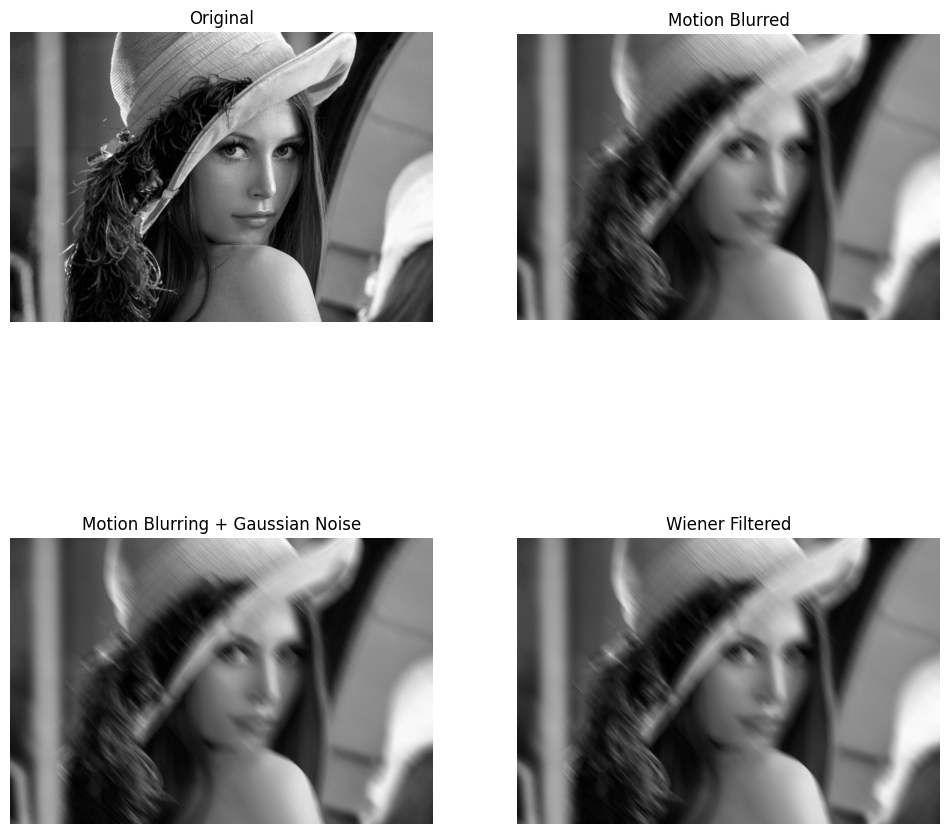

In [7]:
display = [img, blurred_img, noisy_img, filtered_img]
titles = ['Original', 'Motion Blurred', 'Motion Blurring + Gaussian Noise', 'Wiener Filtered']

fig = plt.figure(figsize=(12, 12))
for i in range(len(display)):
    fig.add_subplot(2, 2, i+1)
    plt.imshow(display[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.show()

-0.02085876075966625


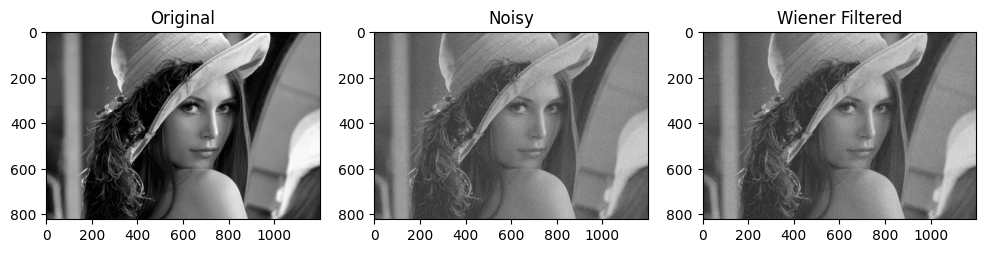

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d, wiener
from PIL import Image

img = Image.open('../data/lena.jpg')
img_gray = img.convert('L')

img_array = np.array(img_gray)

noise = np.random.normal(0, 25, img_array.shape)
noisy_img = img_array + noise
print(np.mean(noise))

filtered_img_array = wiener(noisy_img, mysize=(3, 3))

plt.figure(figsize=(12, 12))

plt.subplot(1, 3, 1)
plt.imshow(img_array, cmap='gray')
plt.title('Original')

plt.subplot(1, 3, 2)
plt.imshow(noisy_img, cmap='gray')
plt.title('Noisy')

plt.subplot(1, 3, 3)
plt.imshow(filtered_img_array, cmap='gray')
plt.title('Wiener Filtered')

plt.show()

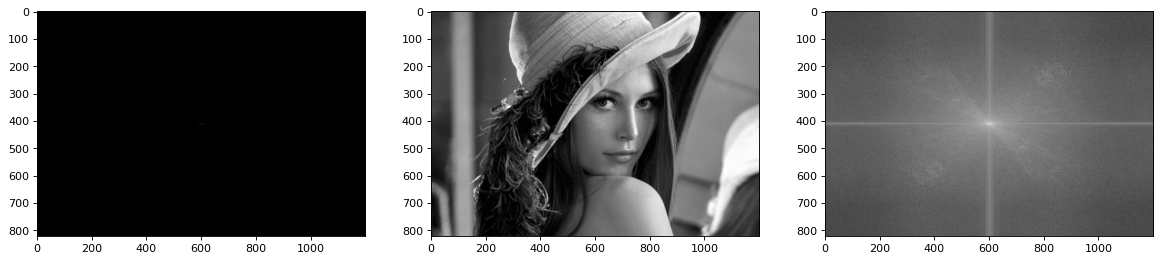

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft2, ifft2
from scipy.signal import gaussian, convolve2d, wiener
from skimage.io import imread, imshow
from skimage.color import rgb2gray, rgb2hsv, rgb2yuv
from skimage import color, exposure, transform
from skimage.exposure import equalize_hist

img = rgb2gray(imread('../data/lena.jpg'))

dark_image_grey_fourier = np.fft.fftshift(np.fft.fft2(img))
plt.figure(num=None, figsize=(18, 16), dpi=80)
plt.subplot(1, 3, 1)
plt.imshow((abs(dark_image_grey_fourier)), cmap='gray')

plt.subplot(1, 3, 2)
plt.imshow(((img)), cmap='gray')

plt.subplot(1, 3, 3)
plt.imshow(np.log(abs(dark_image_grey_fourier)), cmap='gray')

In [10]:
from PIL import Image, ImageDraw

width, height = 200, 200
circle_center = (width//2, height//2)
circle_radius = min(width, height)//3

img = Image.new('L', (width, height), color=0)

draw = ImageDraw.Draw(img)
draw.ellipse((circle_center[0]-circle_radius, circle_center[1]-circle_radius,
                circle_center[0]+circle_radius, circle_center[1]+circle_radius),
                 outline=255)

img.save('../data/circle.png')
img.show()

/snap/core20/current/lib/x86_64-linux-gnu/libstdc++.so.6: version `GLIBCXX_3.4.29' not found (required by /lib/x86_64-linux-gnu/libproxy.so.1)
Failed to load module: /home/amit/snap/code/common/.cache/gio-modules/libgiolibproxy.so


eog: symbol lookup error: /snap/core20/current/lib/x86_64-linux-gnu/libpthread.so.0: undefined symbol: __libc_pthread_init, version GLIBC_PRIVATE


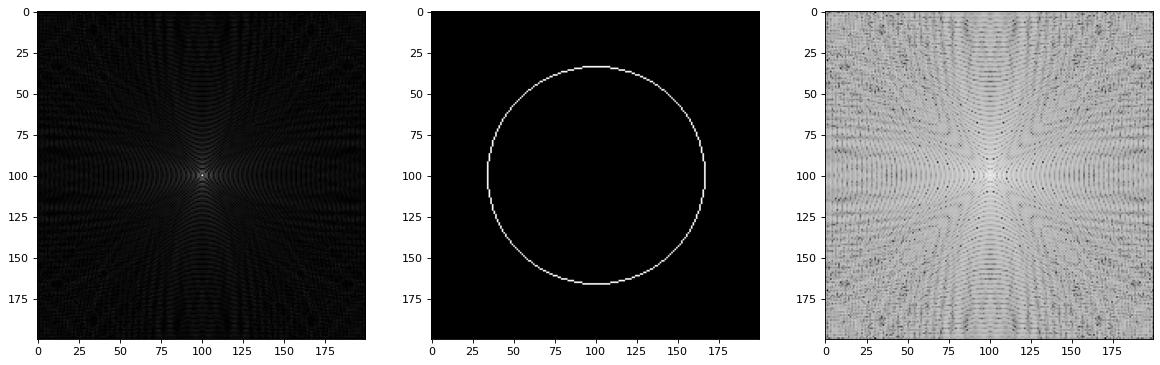

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft2, ifft2
from scipy.signal import gaussian, convolve2d, wiener
from skimage.io import imread, imshow
from skimage.color import rgb2gray, rgb2hsv, rgb2yuv, gray2rgb
from skimage import color, exposure, transform
from skimage.exposure import equalize_hist

img = imread('../data/circle.png')

dark_image_grey_fourier = np.fft.fftshift(np.fft.fft2(img))
plt.figure(num=None, figsize=(18, 16), dpi=80)
plt.subplot(1, 3, 1)
plt.imshow((abs(dark_image_grey_fourier)), cmap='gray')

plt.subplot(1, 3, 2)
plt.imshow(((img)), cmap='gray')

plt.subplot(1, 3, 3)
plt.imshow(np.log(abs(dark_image_grey_fourier)), cmap='gray')

In [12]:
width, height = 200, 200

image = np.zeros((width, height), dtype=np.uint8)

square_size = 20

for i in range(0, width, square_size):
    for j in range(0, height, square_size):
        if (i//square_size + j//square_size) % 2 == 0:
            image[i:i+square_size, j:j+square_size] = 255

binary_image = Image.fromarray(image)

binary_image.save('../data/checkerboard.png')

binary_image.show()

/snap/core20/current/lib/x86_64-linux-gnu/libstdc++.so.6: version `GLIBCXX_3.4.29' not found (required by /lib/x86_64-linux-gnu/libproxy.so.1)
Failed to load module: /home/amit/snap/code/common/.cache/gio-modules/libgiolibproxy.so
/tmp/ipykernel_284058/1405195684.py:21: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(abs(dark_image_grey_fourier)), cmap='gray')


eog: symbol lookup error: /snap/core20/current/lib/x86_64-linux-gnu/libpthread.so.0: undefined symbol: __libc_pthread_init, version GLIBC_PRIVATE


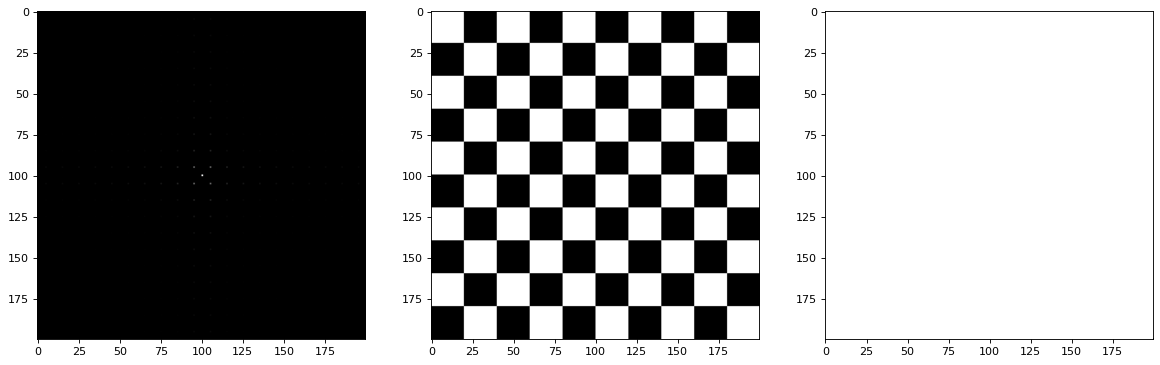

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft2, ifft2
from scipy.signal import gaussian, convolve2d, wiener
from skimage.io import imread, imshow
from skimage.color import rgb2gray, rgb2hsv, rgb2yuv, gray2rgb
from skimage import color, exposure, transform
from skimage.exposure import equalize_hist

img = imread('../data/checkerboard.png')

dark_image_grey_fourier = np.fft.fftshift(np.fft.fft2(img))
plt.figure(num=None, figsize=(18, 16), dpi=80)
plt.subplot(1, 3, 1)
plt.imshow((abs(dark_image_grey_fourier)), cmap='gray')

plt.subplot(1, 3, 2)
plt.imshow(((img)), cmap='gray')

plt.subplot(1, 3, 3)
plt.imshow(np.log(abs(dark_image_grey_fourier)), cmap='gray')

In [21]:
import numpy as np
from PIL import Image
import cv2

img = plt.imread('../data/checkerboard.png')
w_img, h_img = img.shape
print(w_img, h_img)

crow,ccol = w_img//2 , h_img//2

mask = np.ones((w_img, h_img), np.uint8)
r = 80
center = [crow, ccol]

x, y = np.ogrid[:w_img, :h_img]
mask_area = (x - center[0])**2 + (y - center[1])**2 <= r*r
mask[mask_area] = 0

# dark_image_grey_fourier = np.fft.fft2(img)
fshift = dark_image_grey_fourier * mask

if fshift.ndim == 2:
    fshift_mag = np.abs(fshift)
else:
    # Assuming fshift has shape (w_img, h_img, 2)
    fshift_mag = np.sqrt(fshift[:,:,0]**2 + fshift[:,:,1]**2)

fshift_mask_mag = 2000 * np.log(fshift_mag + 1)  # Adding 1 to avoid log(0)
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

image_array = np.array(img)

center_x, center_y = w_img//2, h_img//2
radius = min(w_img, h_img)//3

mask = np.zeros((height, width), dtype=np.uint8)
for i in range(width):
    for j in range(height):
        if (i-center_x)**2 + (j-center_y)**2 <= radius**2:
            mask[i, j] = 255

masked_image_array = np.minimum(image_array, mask)

masked_image = Image.fromarray(masked_image_array)

mode = 'L'  # Assuming you want to save as grayscale
if masked_image_array.ndim == 3:  # If it's an RGB image
    mode = 'RGB'

# Convert the numpy array to an image
masked_image = Image.fromarray(masked_image_array, mode=mode)

# Save the image
masked_image.save('../data/masked_circle.png')

# Show the image
masked_image.show()

200 200


/snap/core20/current/lib/x86_64-linux-gnu/libstdc++.so.6: version `GLIBCXX_3.4.29' not found (required by /lib/x86_64-linux-gnu/libproxy.so.1)
Failed to load module: /home/amit/snap/code/common/.cache/gio-modules/libgiolibproxy.so
eog: symbol lookup error: /snap/core20/current/lib/x86_64-linux-gnu/libpthread.so.0: undefined symbol: __libc_pthread_init, version GLIBC_PRIVATE


[[0.0203803  0.02039422 0.02040258 0.02040537 0.02040258 0.02039422
  0.0203803 ]
 [0.02039422 0.02040816 0.02041652 0.02041931 0.02041652 0.02040816
  0.02039422]
 [0.02040258 0.02041652 0.02042489 0.02042768 0.02042489 0.02041652
  0.02040258]
 [0.02040537 0.02041931 0.02042768 0.02043047 0.02042768 0.02041931
  0.02040537]
 [0.02040258 0.02041652 0.02042489 0.02042768 0.02042489 0.02041652
  0.02040258]
 [0.02039422 0.02040816 0.02041652 0.02041931 0.02041652 0.02040816
  0.02039422]
 [0.0203803  0.02039422 0.02040258 0.02040537 0.02040258 0.02039422
  0.0203803 ]]


Text(0.5, 0, 'Kernel Value')

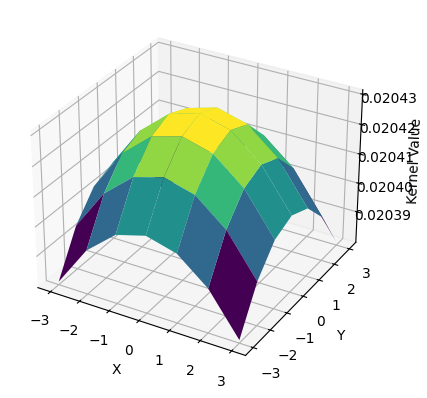

In [28]:
import numpy as np

sigma = 60.5
kernel = np.zeros((7, 7))

x_values = [-3, -2, -1, 0, 1, 2, 3]
y_values = [3, 2, 1, 0, -1, -2, -3]

p, q = np.meshgrid(x_values, y_values)

for i, x in enumerate(x_values):
    for j, y in enumerate(y_values):
        kernel[i, j] = (1/(2*np.pi*sigma**2)) * np.exp(-(x**2 + y**2)/(2*sigma**2))

kernel = kernel / np.sum(kernel)

print(kernel)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(p, q, kernel, cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Kernel Value')

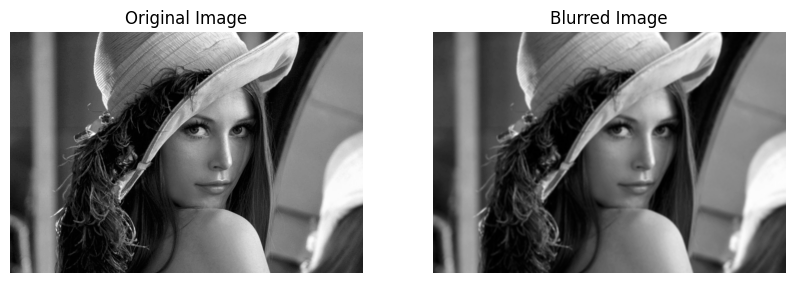

In [30]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.color import rgb2gray, rgb2hsv, rgb2yuv, gray2rgb
from scipy.ndimage import convolve

image = rgb2gray(imread('../data/lena.jpg'))
blurred_image = cv2.filter2D(src=image, ddepth=-1, kernel=kernel)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(blurred_image, cmap='gray')
plt.title('Blurred Image')
plt.axis('off')

plt.show()

Text(0.5, 0, 'Kernel Value')

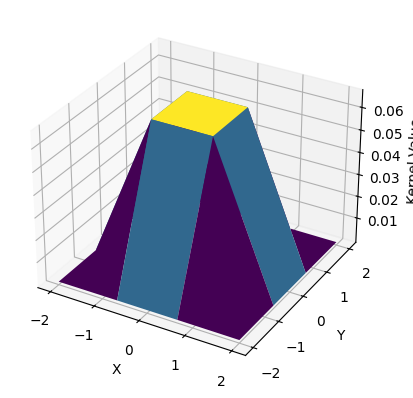

In [31]:
import numpy as np

sigma = .5

size = int(sigma * 6) + 1

kernel = np.zeros((size, size))

x_values = np.linspace(-size//2, size//2, size)
y_values = np.linspace(size//2, -size//2, size)

x, y = np.meshgrid(x_values, y_values)
kernel1 = (1/2*np.pi*sigma**2) * np.exp(-(x**2 + y**2)/(2*sigma**2))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, kernel1, cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Kernel Value')

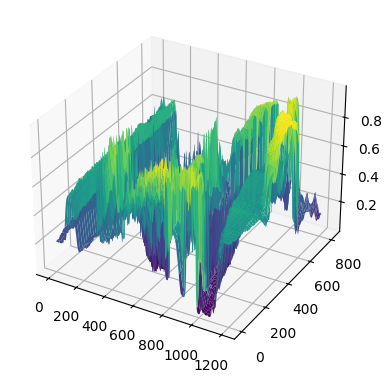

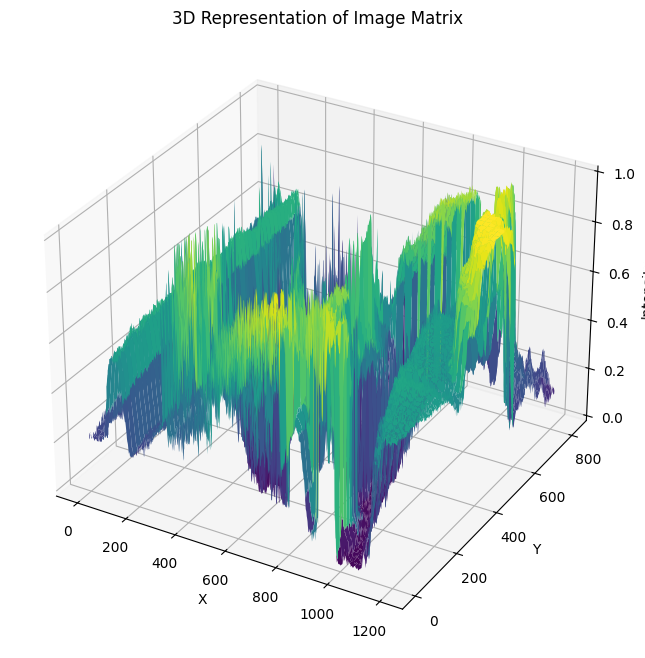

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image

image = rgb2gray(plt.imread('../data/lena.jpg'))

height, width = image.shape

x = np.arange(width)
y = np.arange(height)
x, y = np.meshgrid(x, y)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(x, y, blurred_image, cmap='viridis')

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, image, cmap='viridis')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Intensity')
ax.set_title('3D Representation of Image Matrix')

plt.show()

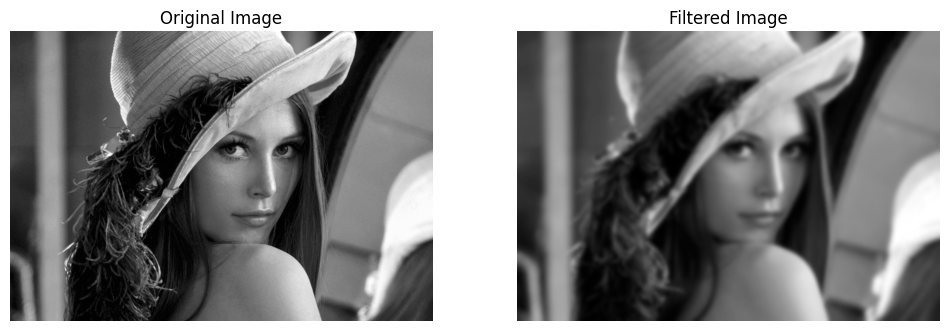

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve1d

def gaussian_kernel(sigma, size):
    x = np.arange(-size//2, size//2 + 1)
    kernel = np.exp(-x**2 / (2*sigma**2))
    return kernel / np.sum(kernel)

def separable_gaussian_filter(image, sigma):
    size = int(sigma * 6) + 1
    kernel = gaussian_kernel(sigma, size)
    filtered_image = convolve1d(convolve1d(image, kernel, axis=0), kernel, axis=1)
    return filtered_image

image = rgb2gray(plt.imread('../data/lena.jpg'))
sigma = 5.5
filtered_image = separable_gaussian_filter(image, sigma)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image')
plt.axis('off')

plt.show()

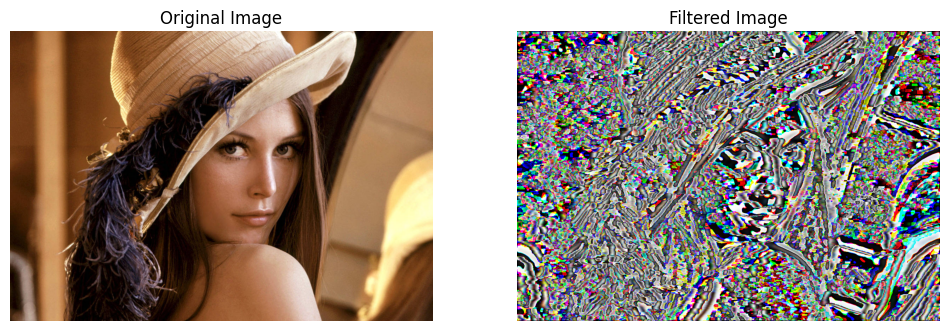

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve1d
from PIL import Image

def gaussian_derivative_kernel(sigma, size, order):
    x = np.arange(-size//2, size//2 + 1)
    kernel = -x * np.exp(-x**2 / (2*sigma**2))
    if order == 1:
        return kernel / (sigma**2)
    elif order == 2:
        return (x**2 - sigma**2) * np.exp(-x**2 / (2*sigma**2)) / (sigma**4)
    else:
        raise ValueError('Order must be 1 or 2')
    
def apply_gaussian_derivative(image, sigma, order):
    size = int(sigma * 6) + 1
    kernel = gaussian_derivative_kernel(sigma, size, order)
    filtered_image = convolve1d(image, kernel, axis=0)
    # return convolve1d(filtered_image, kernel, axis=1)
    return filtered_image

image = Image.open('../data/lena.jpg')
image = np.array(image)
sigma = 5.5
order = 1
filtered_image = apply_gaussian_derivative(image, sigma, order)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image')
plt.axis('off')

plt.show()